In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import embedders

In [3]:
# Try out the embedder, this time with train-test split

dists, labels, adj = embedders.dataloaders.load_polblogs()
dists

Top CC has 1222 nodes; original graph has 1490 nodes.


tensor([[0., 1., 3.,  ..., 4., 3., 3.],
        [1., 0., 3.,  ..., 4., 3., 4.],
        [3., 3., 0.,  ..., 3., 2., 4.],
        ...,
        [4., 4., 3.,  ..., 0., 1., 4.],
        [3., 3., 2.,  ..., 1., 0., 3.],
        [3., 4., 4.,  ..., 4., 3., 0.]], dtype=torch.float64)

In [4]:
import torch
import numpy as np

pm = embedders.manifolds.ProductManifold(signature=[(-1, 2), (0, 2), (1, 2)])

# Get test indices
n = len(labels)
test_idx = np.random.choice(n, size=int(n * 0.2), replace=False)

# Get embedders
x_embed, losses = embedders.coordinate_learning.train_coords(
    pm=pm, dists=dists, test_indices=test_idx, burn_in_iterations=200, training_iterations=1800, learning_rate=1e-1
)

  0%|          | 0/2000 [00:00<?, ?it/s]

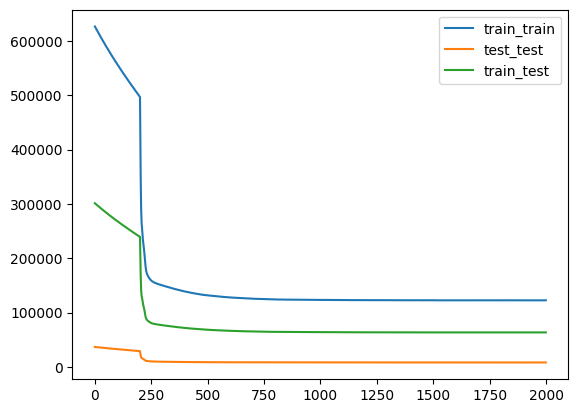

In [5]:
import matplotlib.pyplot as plt

plt.plot(losses["train_train"], label="train_train")
plt.plot(losses["test_test"], label="test_test")
plt.plot(losses["train_test"], label="train_test")
plt.legend()